# Introduction



## Demonstration Setup

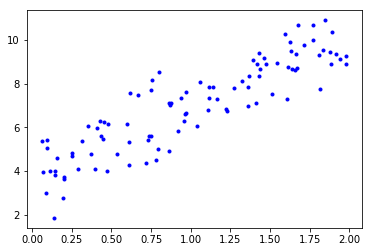

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

# Data Preparation
X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

# Plot the data
plt.plot(X,y, "b.")

In [2]:
def showProgress(i, X, y, theta):
    """
    Helper function to show progress by (a) printing current theta and (b) plotting current
    regression
    """
    print("Theta (i=" + str(i+1) + "): " + str(theta))
    
    # Predict on x=0 and x=2
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]
    y_predict = X_new_b.dot(theta)
    
    # Plot prediction
    plt.plot(X_new, y_predict)
    if (i==0): 
        plt.plot(X,y, "b.")

In [3]:
#####################################################################
#####################################################################

# Linear Regression

## Linear Regression - Closed-Form Solution

Theta (i=1): [[3.79929379]
 [3.158092  ]]


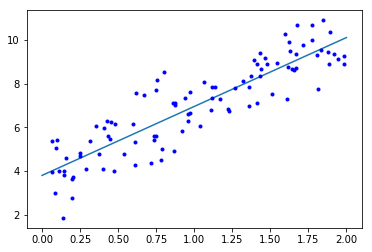

In [4]:
# Solve normal equation for theta
theta = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)

showProgress(0, X, y, theta)

In [5]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)

print(y_predict)

[[ 3.79929379]
 [ 5.37833979]
 [ 6.95738579]
 [ 8.53643178]
 [10.11547778]]


In [6]:
#####################################################################

## Linear Regression using Scikit-Learn

Theta (i=1): [array([3.79929379]), array([[3.158092]])]


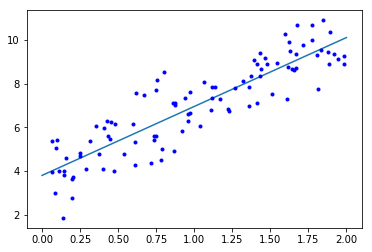

In [7]:
from sklearn.linear_model import LinearRegression
#  Create a linear regression and train it
lin_reg = LinearRegression()
lin_reg.fit(X,y)

theta = [lin_reg.intercept_, lin_reg.coef_]
showProgress(0, X, y, theta)

In [8]:
# Make a prediction using trained model
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = lin_reg.predict(X_new)

print(y_predict)

[[ 3.79929379]
 [ 5.37833979]
 [ 6.95738579]
 [ 8.53643178]
 [10.11547778]]


In [9]:
#####################################################################

## Batch Linear Regression

Theta (i=1): [[-0.60105131]
 [-1.13294524]]
Theta (i=1): [[1.14173486]
 [0.91232897]]
Theta (i=2): [[2.12475946]
 [2.05403676]]
Theta (i=3): [[2.68163769]
 [2.68931314]]
Theta (i=4): [[2.99941735]
 [3.04080781]]
Theta (i=5): [[3.18297274]
 [3.23334515]]
Theta (i=6): [[3.29110723]
 [3.33690365]]
Theta (i=7): [[3.35679429]
 [3.39071254]]
Theta (i=8): [[3.3985256 ]
 [3.41676149]]
Theta (i=9): [[3.42667349]
 [3.42737496]]
Theta (i=10): [[3.44705795]
 [3.42945868]]
Theta (i=11): [[3.46294659]
 [3.42688052]]
Theta (i=12): [[3.47617584]
 [3.42180523]]
Theta (i=13): [[3.48777963]
 [3.41544289]]
Theta (i=14): [[3.49834182]
 [3.40846839]]
Theta (i=15): [[3.5081938 ]
 [3.40125671]]
Theta (i=16): [[3.5175253 ]
 [3.39401481]]
Theta (i=17): [[3.52644649]
 [3.38685548]]
Theta (i=18): [[3.53502283]
 [3.3798389 ]]
Theta (i=19): [[3.54329459]
 [3.37299579]]
Theta (i=20): [[3.55128782]
 [3.36634046]]
Theta (i=21): [[3.55902046]
 [3.35987812]]
Theta (i=22): [[3.56650583]
 [3.35360898]]
Theta (i=23): [[3.5

Theta (i=214): [[3.79875561]
 [3.15854406]]
Theta (i=215): [[3.79877236]
 [3.15853   ]]
Theta (i=216): [[3.79878858]
 [3.15851637]]
Theta (i=217): [[3.7988043 ]
 [3.15850316]]
Theta (i=218): [[3.79881954]
 [3.15849037]]
Theta (i=219): [[3.79883429]
 [3.15847797]]
Theta (i=220): [[3.79884859]
 [3.15846596]]
Theta (i=221): [[3.79886245]
 [3.15845432]]
Theta (i=222): [[3.79887587]
 [3.15844305]]
Theta (i=223): [[3.79888887]
 [3.15843212]]
Theta (i=224): [[3.79890147]
 [3.15842154]]


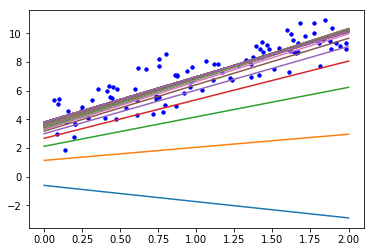

In [10]:
# Set algorithm parameters
eta = 0.1 
n_iterations = 10000
m = (len(X)) # number of inputs
epsilon = 0.00001

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

# Train Linear Model
for i in range(0,n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 2/m * XT.(X.theta - y)

    if np.mean(-gradients) < epsilon:
        break
    
    theta = theta - eta * gradients
    
    showProgress(i, X, y, theta)
    
                
    

In [11]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new] 

y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 3.79890147]
 [ 5.37811224]
 [ 6.95732301]
 [ 8.53653378]
 [10.11574455]]


In [12]:
#####################################################################

## Stochastic Gradient Descent

In [13]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[1.47046452]
 [0.97685002]]
Theta (i=1): [[3.80700542]
 [3.36343894]]
Theta (i=2): [[3.60432654]
 [3.35007502]]
Theta (i=3): [[3.59053285]
 [3.50330807]]
Theta (i=4): [[3.55701638]
 [3.35174271]]
Theta (i=5): [[3.65483849]
 [3.333955  ]]
Theta (i=6): [[3.66156946]
 [3.40652705]]
Theta (i=7): [[3.61111045]
 [3.22806692]]
Theta (i=8): [[3.58611176]
 [3.05153421]]
Theta (i=9): [[3.70595004]
 [3.24831455]]
Theta (i=10): [[3.66429045]
 [3.29234307]]
Theta (i=11): [[3.697049  ]
 [3.33045982]]
Theta (i=12): [[3.69582414]
 [3.3200793 ]]
Theta (i=13): [[3.65379936]
 [3.22370125]]
Theta (i=14): [[3.62430766]
 [3.23502229]]
Theta (i=15): [[3.68776212]
 [3.19705125]]
Theta (i=16): [[3.72041458]
 [3.23368751]]
Theta (i=17): [[3.72935591]
 [3.19395347]]
Theta (i=18): [[3.75225259]
 [3.219261  ]]
Theta (i=19): [[3.701098  ]
 [3.18126219]]
Theta (i=20): [[3.65904998]
 [3.14361794]]
Theta (i=21): [[3.74480218]
 [3.20526769]]
Theta (i=22): [[3.78734796]
 [3.20586307]]
Theta (i=23): [[3.795

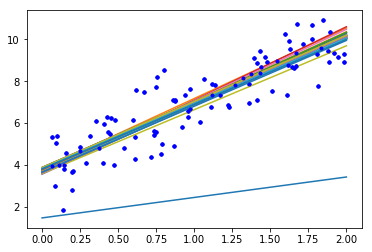

In [14]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 2 * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [15]:
# Predictions based upon theta

X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)
print(y_predict)

[[3.80761347]
 [5.35224404]
 [6.89687462]
 [8.4415052 ]
 [9.98613578]]


In [16]:
#####################################################################

## Mini-Batch Gradient Descent

In [17]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[-0.0344371 ]
 [-1.03295318]]
Theta (i=1): [[3.77258064]
 [3.2288661 ]]
Theta (i=2): [[3.74546295]
 [3.2006602 ]]
Theta (i=3): [[3.88355778]
 [3.19847672]]
Theta (i=4): [[3.8439643 ]
 [3.14714549]]
Theta (i=5): [[3.80937096]
 [3.09307093]]
Theta (i=6): [[3.88358069]
 [3.18051818]]
Theta (i=7): [[3.82761349]
 [3.13123614]]
Theta (i=8): [[3.84748421]
 [3.17072803]]
Theta (i=9): [[3.82503485]
 [3.12351377]]
Theta (i=10): [[3.84489435]
 [3.13937158]]
Theta (i=11): [[3.83999967]
 [3.13920713]]
Theta (i=12): [[3.86353296]
 [3.14653138]]
Theta (i=13): [[3.85336372]
 [3.11099614]]
Theta (i=14): [[3.82598627]
 [3.12850566]]
Theta (i=15): [[3.83211737]
 [3.12038533]]
Theta (i=16): [[3.82437191]
 [3.12472779]]
Theta (i=17): [[3.85126563]
 [3.16788273]]
Theta (i=18): [[3.81541469]
 [3.12840916]]
Theta (i=19): [[3.84190925]
 [3.14225065]]
Theta (i=20): [[3.83198593]
 [3.1320135 ]]
Theta (i=21): [[3.82698903]
 [3.12799944]]
Theta (i=22): [[3.83513137]
 [3.12798844]]
Theta (i=23): [[3.8

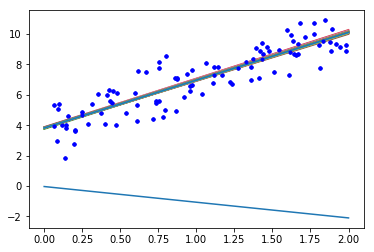

In [18]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

batch_size = 5 # b


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.arange(m) #array from 0 to m-1
        np.random.shuffle(rand_idx) #shuffle index arry

        xi = X_b[rand_idx[:batch_size]] #grab labels for first b rows
        yi = y[rand_idx[:batch_size]]   #grab labels for first b rows
        
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)  # 2/b * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [19]:
# Predictions based upon theta

X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 3.81517573]
 [ 5.38887002]
 [ 6.96256431]
 [ 8.5362586 ]
 [10.1099529 ]]


In [20]:
#####################################################################
#####################################################################

# Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

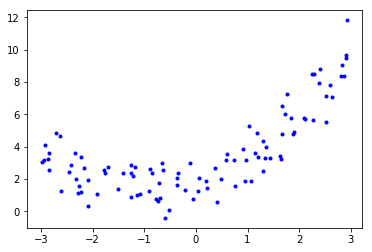

In [22]:
# Polynomial Regression - From textbook

# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

In [23]:
# Add extra features for degree 2 using PolynomialFeatures transform
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train the modified input data set.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.61178211] [[ 1.39504587e+00  1.29078395e+00 -1.29785510e+00 -5.82240066e-01
   6.74329499e-01  1.88305509e-01 -1.18380290e-01 -2.68338047e-02
   6.66752270e-03  1.37063435e-03]]


<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


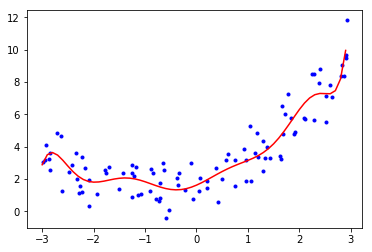

In [24]:
x_test = [[0.1*x] for x in range(-30,30)]

print(lin_reg.predict)
test_X_poly = poly_features.fit_transform(x_test)

predict = lin_reg.predict(test_X_poly)
plt.plot(X,y,"b.")
plt.plot(x_test, predict,"r-")

In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Add extra features up to polynomial 3
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train the model with the added features.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.80541813] [[0.78804098 0.54615794 0.03225296]]


# Performance Analysis Using Learning Curves

Demonstrated using Polynomial Regression examples.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
# Learning Cuve function

def plot_learning_curves(model, X, y):
    """
    Plots performance on the training set and testing (validation) set.
    X-axis - number of training samples used
    Y-axis - RMSE
    """
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)
    
    training_errors, validation_errors = [], []
    
    for m in range(1, len(train_X)):
        
        model.fit(train_X[:m], train_y[:m])
        
        train_pred = model.predict(train_X)
        val_pred = model.predict(test_X)
        
        training_errors.append(np.sqrt(mean_squared_error(train_y, train_pred)))
        validation_errors.append(np.sqrt(mean_squared_error(test_y, val_pred)))
        
    plt.plot(training_errors, "r-+", label="train")
    plt.plot(validation_errors, "b-", label="test")
    plt.axis([0, 80, 0, 3])   
    

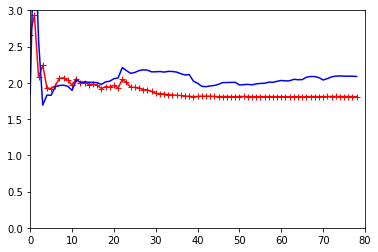

In [32]:
# Learning curve for a linear regression model

plot_learning_curves(LinearRegression(), X, y)

In [ ]:
# Demo w/ Degree = 2

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

deg = 2
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

In [ ]:
# Demo w/ Degree = 3

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

deg = 3
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

In [ ]:
#####################################################################
#####################################################################

# Regularization Techniques

## Ridge Regression

In [ ]:
# Includes
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

### Demonstration Data Set and Test Inputs

In [ ]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

Closed-Form Approach using Ridge class w/ Cholesky solver (formulation of closed form solution for regression with ridge regularization)

In [ ]:
alpha = 0.8

# Build and Train
model = Ridge(alpha=alpha, solver="cholesky")
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

In [ ]:
for a in range(0,1000,100):
    
    alpha = (a+1)
    
    model = Ridge(alpha=alpha, solver="cholesky")
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(alpha))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

In [ ]:
deg = 2
for a in range(0,1001,100):
    
    alpha = a+1
    
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
        ("Ridged", Ridge(alpha=alpha, solver="cholesky")),
        ])
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(alpha))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

### Stochastic Gradient Descent w/ Ridge Regression Enabled as L2 penalty

In [ ]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD Ridge", SGDRegressor(penalty="l2", max_iter=100000, tol=0.00001)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

In [ ]:
#####################################################################

## Lasso Regularization

The following declares the includes for this demonstration.

In [ ]:
# Includes
from sklearn.linear_model import Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### Demonstration Data Set and Test Inputs

In [ ]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

### Lasso Regression - Linear Example

This demonstrates the Linear Regression with Lasso Model using the Lasso class built into SkLearn

In [ ]:
alpha = 0.8

# Build and Train
model = Lasso(alpha=alpha)
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

In [ ]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Lasso(alpha=alpha)
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

### Lasso Regression - Polynomial Example

Now, we will change our model to a polynomial of a specified degreee.  We can then observe how our model is impacted as alpha is adjusted.

In [ ]:
alpha = 0.8
deg = 2

# Build and Train
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Lasso", Lasso(alpha=alpha)),
    ])
    
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

In [ ]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Lasso", Lasso(alpha=alpha)),
    ])
    
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())
    
plt.figure(0)
plt.plot(X,y,"b.")

### Lasso Regression - Stochastic Gradient Descent Example

Now, we will utilize steepest gradient descent with an l1 penalty to implement our lasso regression.  For our example, we will use a polynomial model.

In [ ]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD Lasso", SGDRegressor(penalty="l1", max_iter=1000, tol=0.01)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

## Demo Boston Data Set

Dataset User Guide: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
Dataset API Info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston


   * CRIM per capita crime rate by town
   * ZN proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS proportion of non-retail business acres per town
   * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX nitric oxides concentration (parts per 10 million)
   * RM average number of rooms per dwelling
   * AGE proportion of owner-occupied units built prior to 1940
   * DIS weighted distances to five Boston employment centres
   * RAD index of accessibility to radial highways
   * TAX full-value property-tax rate per \$10,000
   * PTRATIO pupil-teacher ratio by town
   * B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * LSTAT % lower status of the population
   * MEDV Median value of owner-occupied homes in \$1000’s


In [ ]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from pandas.plotting import scatter_matrix

%matplotlib inline 

boston_housing_data = datasets.load_boston()

In [ ]:
# Attempt to visualize data
boston_df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

for column in boston_df.columns:
    plt.figure()
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.plot(boston_df[column], boston_df["MEDV"], "b.")

scatter_matrix(boston_df, figsize=(12, 12))

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(boston_housing_data.data,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

In [ ]:
attributes = ["AGE","RM","LSTAT"]
boston_data_set = boston_df[attributes].values

train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

In [ ]:
from sklearn.preprocessing import normalize

boston_data_set = normalize(boston_housing_data.data, axis=0, norm='max')


train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

boston_data_set = scaler.fit_transform(boston_housing_data.data)


train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
# Regularized

scaler = StandardScaler()

boston_data_set = scaler.fit_transform(boston_housing_data.data)


train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = SGDRegressor(penalty="l2", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)